In [2]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=60, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

import json

def load_data(file_name):
    print(file_name)
    
    data = json.load( open(file_name))
    print(data.keys())
    return data

## Nash DQN Results

./data/Safexp-PointGoal1-v0_ppo.json
dict_keys(['time_step', 'avg_length', 'running_reward', 'running_cost'])


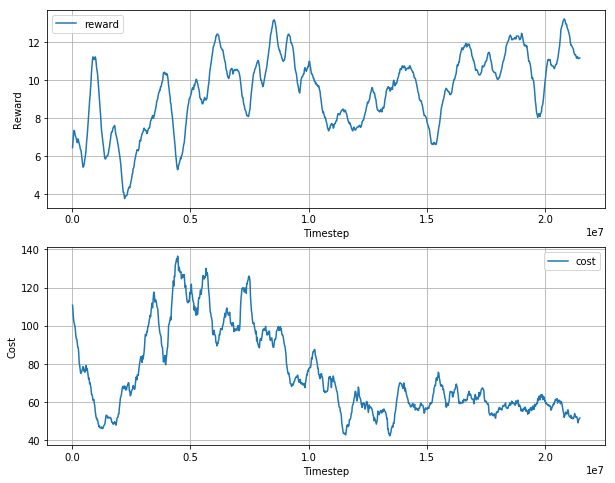

In [15]:
env_name = "Safexp-PointGoal1-v0"
data_file_path = f'./data/{env_name}_ppo.json'
data = load_data(data_file_path)

fig, axs = plt.subplots(2, figsize=(10,8))


axs[0].plot(data['time_step'], smooth(data['running_reward'], radius=10), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(data['time_step'], smooth(data['running_cost'], radius=10), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_ppo.pdf')

./data/Safexp-PointGoal1-v0_mp_ppo.json
dict_keys(['time_step', 'avg_length', 'running_reward', 'running_cost'])


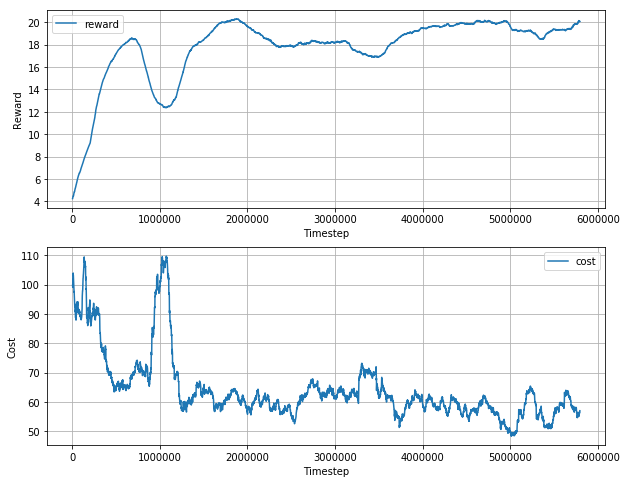

In [47]:
env_name = "Safexp-PointGoal1-v0"
data_file_path = f'./data/{env_name}_mp_ppo.json'
data = load_data(data_file_path)

fig, axs = plt.subplots(2, figsize=(10,8))
timesteps_per_epi = 1000

axs[0].plot(np.array(data['time_step'])*timesteps_per_epi, smooth(data['running_reward'], radius=100), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(np.array(data['time_step'])*timesteps_per_epi, smooth(data['running_cost'], radius=100), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_ppo.pdf')

In [5]:
import torch
import numpy as np
mean=torch.FloatTensor(np.array([1,1]))
std=torch.FloatTensor(np.array([1,1]))

pi = torch.distributions.Normal(mean, std)
a = pi.sample()[0]

RuntimeError: "normal_kernel_cpu" not implemented for 'Long'